# The hysteresis of Iron

This is a notebook to accompany the 2nd-year experiement _the Hysteresis of Iron_ at UTAS.

Written and curated by AJM, created May 2023, Version 0.0.1 dated June 2023.

## Import packages

To streamline operations in Python, packages can be imported to perform a host of various tasks. To make this process as simple as possible, all the required packages are included in the file _hysteresis.py_

In [2]:
from hysteresis import *

## Anhysteretic magnetisation

As discussed in the notes, the Jiles–Atherton model relies on solving a differential equation, which includes the _anhysteretic_ magnetisation. This can be calculated, and a sample plot is shown below, based on the parameters from the paper _On the parameter identification and application of the Jiles-Atherton hysteresis model for numerical modelling of measured characteristics_

### Initialise the parameters

In [40]:
Ms = 1.48e6 # Saturation magnetisation [A/m]
a = 1000 # domain wall density (roughly the magnetic field strength) [A/m]
Hmin = -5000 # minimum external field strength [A/m]
Hmax = 5000 # maximum external field strength [A/m]

alpha = 9.38e-4 # mean field parameter

### Make the plot

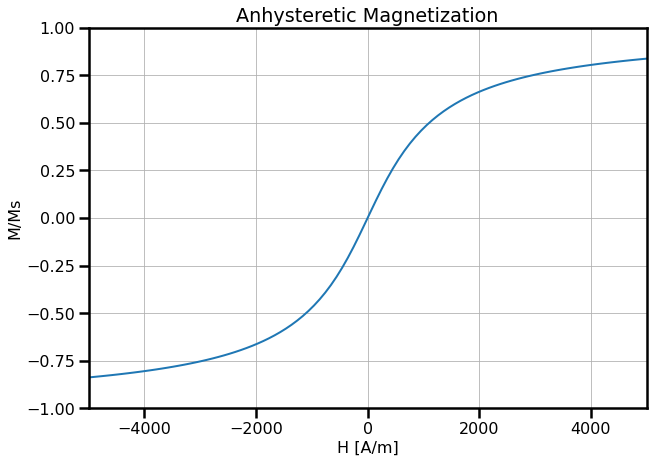

In [41]:
fig, ax = plt.subplots()

plot_anhysteretic(ax, Hmin, Hmax, Ms, a, alpha)
ax.set_xlim([Hmin, Hmax])
ax.set_ylim([-1, 1])
ax.set_xlabel('H [A/m]')
ax.set_ylabel('M/Ms')
ax.set_title('Anhysteretic Magnetization')
plt.grid()
plt.show()

## Hysteresis in all its glory

The process for solving for the full hysteresis curve is more complicated, but we can manipulate it in the same way: investigating the effects of altering specific parameters. Once again, these parameters come from the paper _On the parameter identification and application of the Jiles-Atherton hysteresis model for numerical modelling of measured characteristics_

### Initializate the parameters

In [36]:
Hmax = 5000 # maximum external field strength [A/m]
Ms = 1.48e6 # Saturation magnetisation [A/m]
a = 470 # domain wall density (roughly the magnetic field strength) [A/m]
alpha = 9.38e-4 # mean field parameter
k = 483 # Hysteretic parameter [A/m]
c = 0.0889 # Magnetic reversibility

### Make the plot

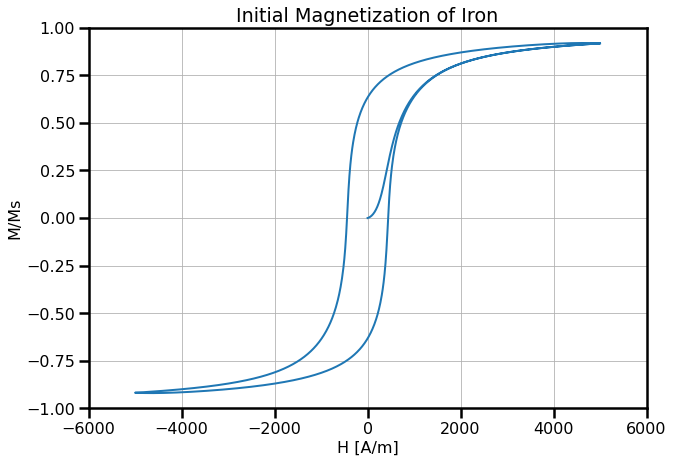

In [37]:
H = H_arr(Hmax, curve_type='full')
M0 = 0
dydt = partial(dMdH, Ms=Ms, a=a, alpha=alpha, k=k, c=c)
M = np.array(euler(dydt, M0, H))
plt.plot(H, M / Ms)
plt.xlim([-Hmax-1000, Hmax+1000])
plt.ylim([-1, 1])
plt.title('Initial Magnetization of Iron')
plt.xlabel('H [A/m]')
plt.ylabel('M/Ms')
plt.grid()
if False:
    plt.savefig('initialmag.pdf', facecolor='white', transparent=False)
plt.show()